In [1]:
#Extra step to unzip the data set
import zipfile

# Replace 'path_to_zip_file' and 'extract_path' with your actual paths
with zipfile.ZipFile('/content/drive/MyDrive/DataSets/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/DataSets')


In [3]:
#importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/ADANIPORTS.csv')

In [5]:
#To see above five data rows
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [6]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [8]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
data.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [21]:
stockprice_one_year = data[(data['Date']>'2011-03-31')&(data['Date']<'2012-04-01')]
stockprice_one_year


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
826,2011-04-01,MUNDRAPORT,EQ,136.65,138.00,142.25,137.50,141.00,141.15,140.36,1716486,2.409280e+13,NaN,965478,0.5625
827,2011-04-04,MUNDRAPORT,EQ,141.15,142.35,149.10,141.50,148.95,148.20,146.00,1125553,1.643326e+13,NaN,501391,0.4455
828,2011-04-05,MUNDRAPORT,EQ,148.20,148.50,158.00,148.05,157.00,156.85,154.12,1712167,2.638708e+13,NaN,475131,0.2775
829,2011-04-06,MUNDRAPORT,EQ,156.85,158.00,158.40,152.25,154.15,153.65,155.05,934007,1.448215e+13,NaN,424174,0.4541
830,2011-04-07,MUNDRAPORT,EQ,153.65,154.75,157.00,152.70,155.75,155.75,154.85,1042870,1.614923e+13,NaN,663880,0.6366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,2012-03-26,ADANIPORTS,EQ,123.45,123.00,123.70,119.05,119.75,120.55,121.00,1124699,1.360846e+13,14021.0,602271,0.5355
1071,2012-03-27,ADANIPORTS,EQ,120.55,121.55,123.00,118.25,121.65,121.50,120.66,1098462,1.325451e+13,14310.0,487096,0.4434
1072,2012-03-28,ADANIPORTS,EQ,121.50,121.50,121.50,117.00,118.55,118.25,118.44,1756343,2.080279e+13,26906.0,1083219,0.6167
1073,2012-03-29,ADANIPORTS,EQ,118.25,118.00,125.50,116.10,124.15,124.20,120.57,2869127,3.459164e+13,29996.0,1933482,0.6739


In [22]:
stockprice_one_year.isnull().sum()

Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                40
Deliverable Volume     0
%Deliverble            0
dtype: int64

In [23]:
stockprice_one_year.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,209.000000,2.490000e+02,249.000000
mean,144.573293,144.885141,147.858635,141.528916,144.489357,144.544578,144.662289,1.535630e+06,2.207001e+13,13896.727273,9.089178e+05,0.534747
std,12.124482,12.221643,12.205498,12.348991,12.179215,12.151759,12.291169,1.673377e+06,2.535781e+13,7357.804577,1.350635e+06,0.137184
min,114.700000,117.500000,120.900000,111.000000,115.000000,114.700000,115.900000,2.209200e+04,3.235358e+11,417.000000,9.831000e+03,0.186900
25%,135.600000,135.000000,137.950000,131.950000,135.000000,135.500000,135.080000,7.216570e+05,1.043463e+13,8995.000000,3.379690e+05,0.438000
50%,146.800000,147.100000,149.800000,143.750000,146.600000,146.800000,146.690000,1.145520e+06,1.675321e+13,12293.000000,6.325790e+05,0.542200
75%,154.750000,155.050000,157.750000,151.650000,154.400000,154.750000,155.010000,1.744030e+06,2.530024e+13,17565.000000,1.029768e+06,0.620800
max,165.000000,165.050000,170.450000,163.550000,165.400000,165.000000,166.370000,2.066316e+07,3.322895e+14,46546.000000,1.726969e+07,0.943300


<Axes: >

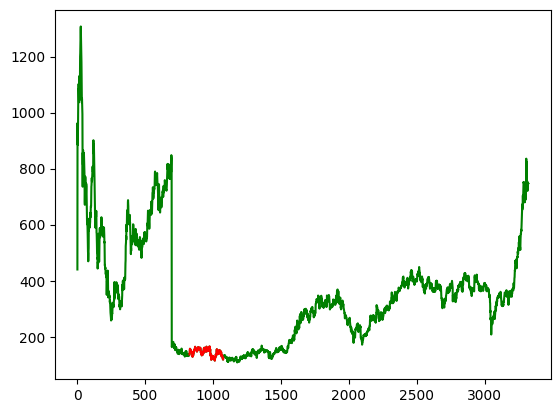

In [24]:
pl = data['Prev Close'].plot(c='green')
stockprice_one_year['Prev Close'].plot(ax=pl, c='red')

In [28]:
# Feature engineering: Creating lagged features
stockprice_one_year['Lagged_Close'] = stockprice_one_year['Close'].shift(1)

<ipython-input-28-feefb926d14a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockprice_one_year['Lagged_Close'] = stockprice_one_year['Close'].shift(1)


In [29]:
stockprice_one_year = stockprice_one_year.dropna()

In [30]:
# Split data into features (X) and target (y)
X = stockprice_one_year[['Lagged_Close']]
y = stockprice_one_year['Close']

In [31]:
# Split data into training and testing sets with adjusted parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# Check if train set is empty and adjust parameters if necessary
if X_train.shape[0] == 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [33]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 12.520235809588273


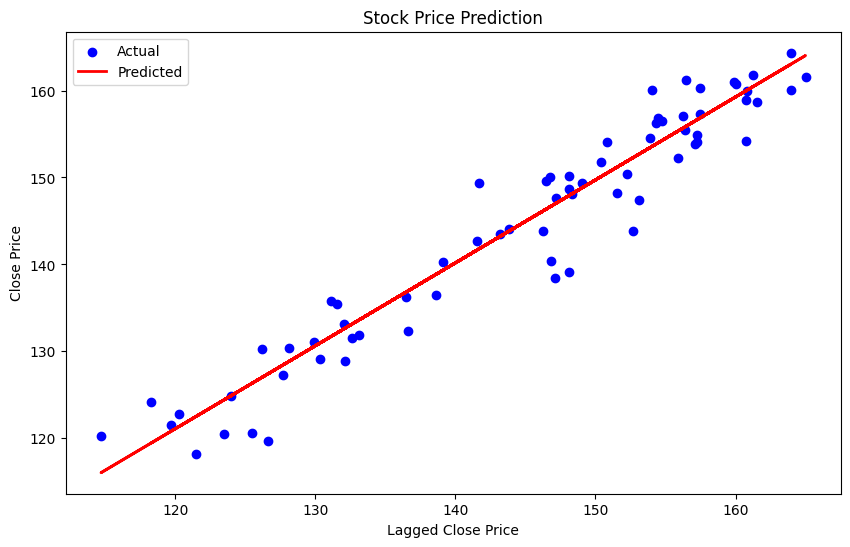

In [36]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Lagged Close Price')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()